In [87]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [88]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [89]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [90]:
pharma_data['Treated_with_drugs']=pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

In [91]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [92]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [93]:
pharma_data['A'].fillna(method='ffill',inplace=True)

In [94]:
pharma_data['B'].fillna(method='ffill',inplace=True)

In [95]:
pharma_data['C'].fillna(method='ffill',inplace=True)

In [96]:
pharma_data['D'].fillna(method='ffill',inplace=True)


In [97]:
pharma_data['E'].fillna(method='ffill',inplace=True)


In [98]:
pharma_data['F'].fillna(method='ffill',inplace=True)


In [99]:
pharma_data['Z'].fillna(method='ffill',inplace=True)


In [100]:
pharma_data['Number_of_prev_cond']=pharma_data['A']+pharma_data['B']+pharma_data['C']+pharma_data['D']+pharma_data['E']+pharma_data['F']+pharma_data['Z']

In [101]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [102]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [103]:
pharma_data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,0.000304,-0.007259,0.004490,0.004623,0.006881,-0.004963,0.000866,0.007413,0.040983,0.009483,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,-0.008971,0.008305,0.003496,0.003781,-0.001863,-0.006730,0.008019,0.006210,-0.041702,0.005317,-0.004450
Patient_ID,0.000235,0.008315,1.000000,0.014015,-0.023189,-0.005609,-0.013361,-0.006755,-0.002929,0.001863,0.009352,0.041227,-0.007433,-0.004214
Patient_Age,0.000304,-0.008971,0.014015,1.000000,-0.006560,-0.023784,-0.010240,-0.009440,0.001632,-0.006689,0.008246,0.114038,-0.016413,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.023189,-0.006560,1.000000,0.020204,0.002449,-0.018174,-0.009928,-0.002536,-0.017103,-0.136708,-0.014490,-0.121844
A,0.004490,0.003496,-0.005609,-0.023784,0.020204,1.000000,-0.063429,-0.088719,-0.074312,-0.162923,-0.056445,-0.070362,0.171649,-0.047598
B,0.004623,0.003781,-0.013361,-0.010240,0.002449,-0.063429,1.000000,-0.020128,-0.001186,-0.017688,-0.015789,-0.009417,0.393556,-0.046232
C,0.006881,-0.001863,-0.006755,-0.009440,-0.018174,-0.088719,-0.020128,1.000000,0.007868,-0.027009,0.001480,-0.011302,0.446019,-0.029998
D,-0.004963,-0.006730,-0.002929,0.001632,-0.009928,-0.074312,-0.001186,0.007868,1.000000,-0.014027,-0.010645,-0.007152,0.320752,-0.101664
E,0.000866,0.008019,0.001863,-0.006689,-0.002536,-0.162923,-0.017688,-0.027009,-0.014027,1.000000,-0.005228,-0.019116,0.541686,0.017738


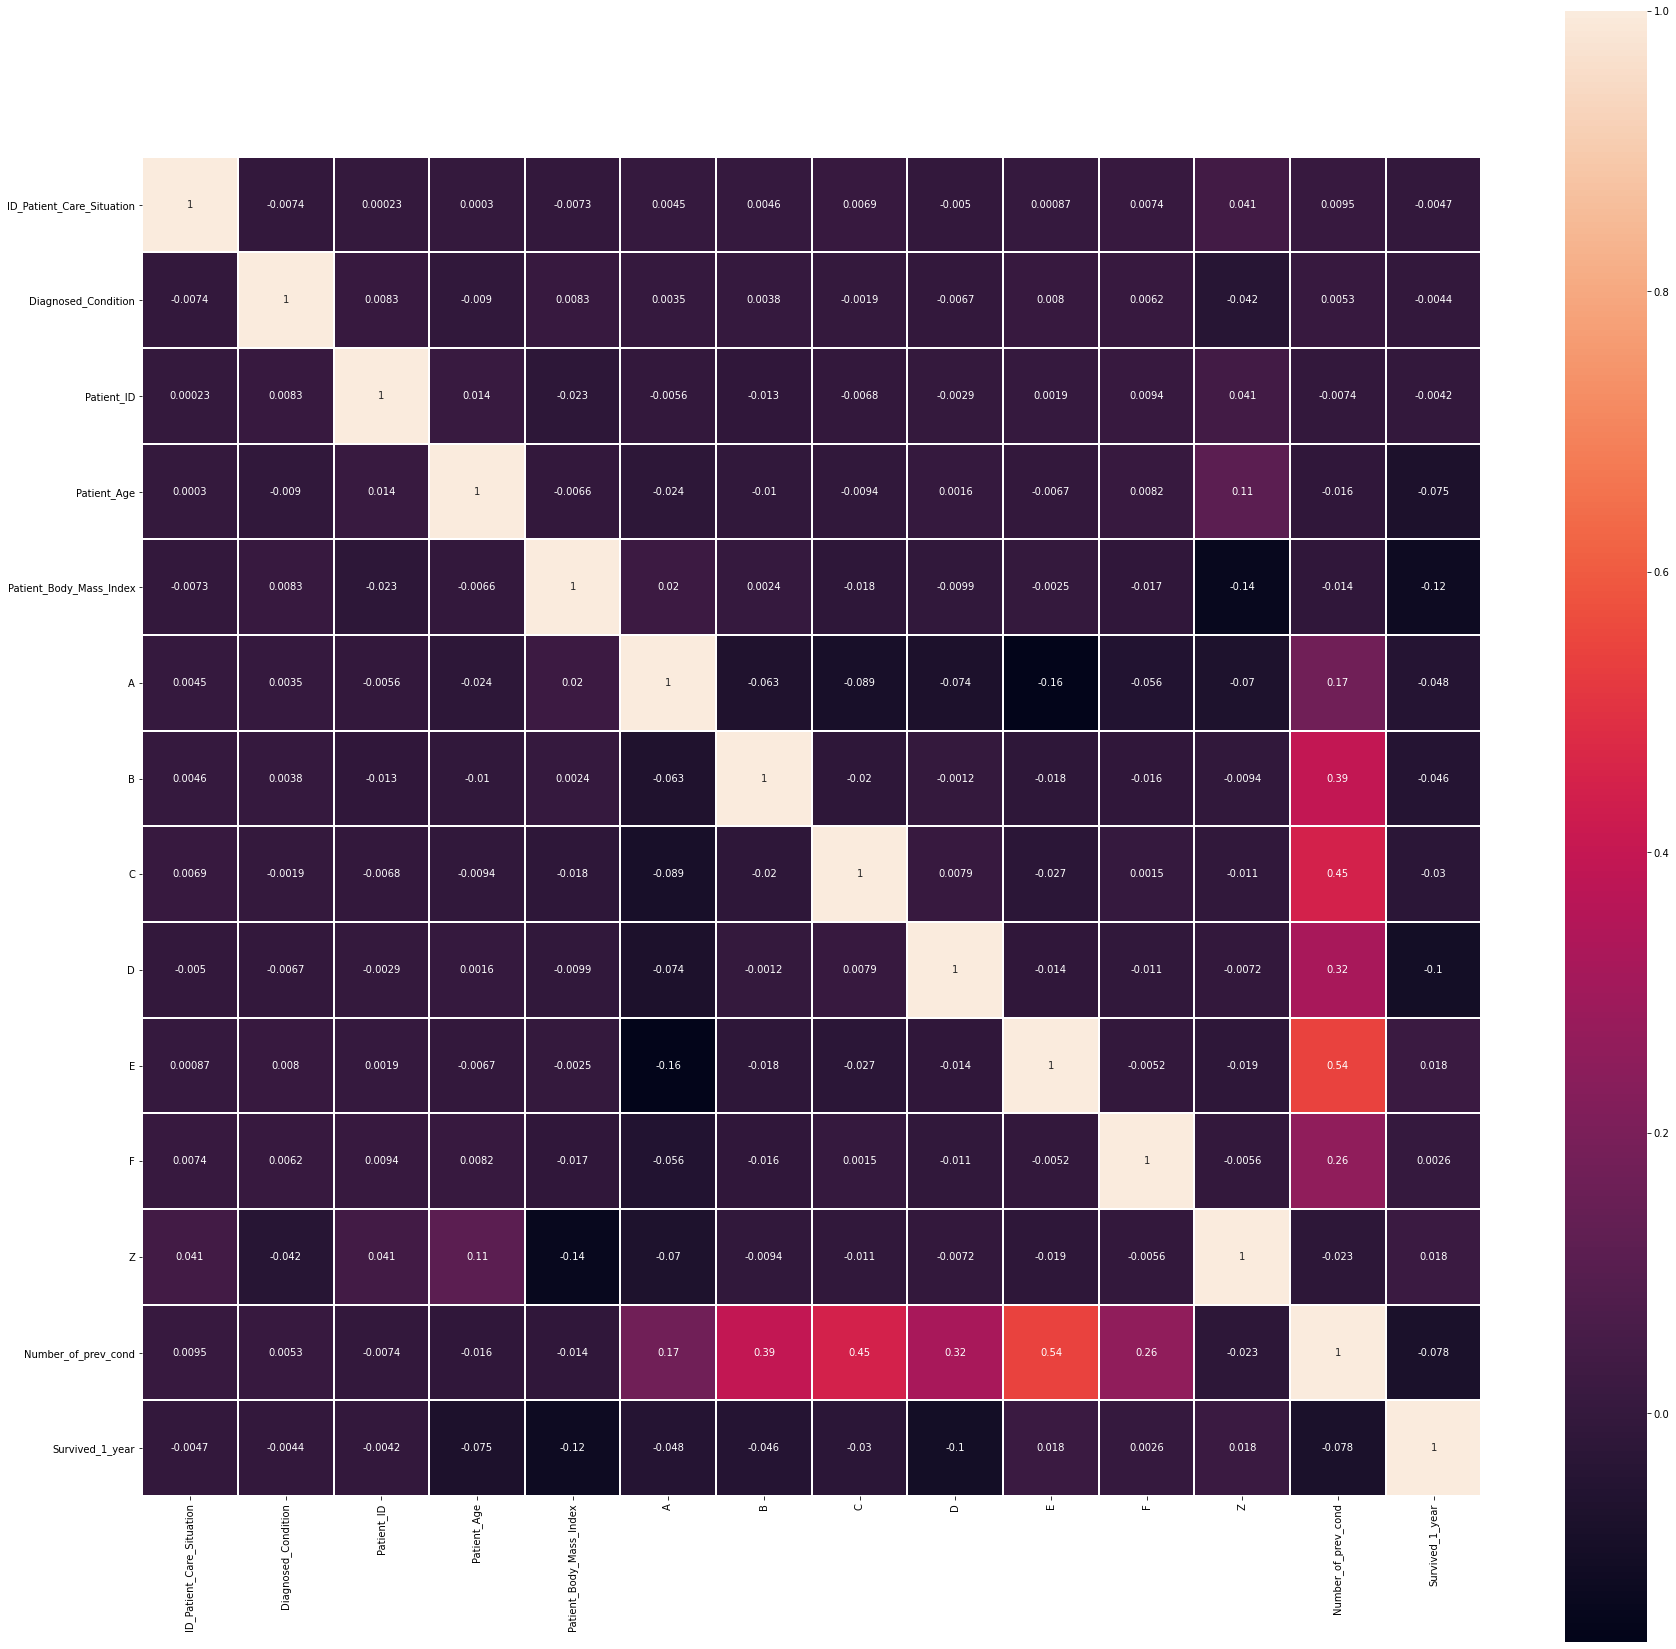

In [104]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(pharma_data.corr(),annot=True,square=True,linewidths=1,ax=ax)

In [105]:
X = pharma_data.drop('Survived_1_year', axis = 1)
y = pharma_data['Survived_1_year']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
from sklearn.preprocessing import LabelEncoder
### label encode the categorical values and convert them to numbers 
le = LabelEncoder() 
le.fit(X_train['Treated_with_drugs'].astype(str))
X_train['Treated_with_drugs'] = le.transform(X_train['Treated_with_drugs'].astype(str))
X_test['Treated_with_drugs'] = le.transform(X_test['Treated_with_drugs'].astype(str))
le.fit(X_train['Patient_Smoker'].astype(str))
X_train['Patient_Smoker'] = le.transform(X_train['Patient_Smoker'].astype(str))
X_test['Patient_Smoker'] = le.transform(X_test['Patient_Smoker'].astype(str))
le.fit(X_train['Patient_Rural_Urban'].astype(str))
X_train['Patient_Rural_Urban'] = le.transform(X_train['Patient_Rural_Urban'].astype(str))
X_test['Patient_Rural_Urban'] = le.transform(X_test['Patient_Rural_Urban'].astype(str)) 
le.fit(X_train['Patient_mental_condition'].astype(str))
X_train['Patient_mental_condition'] = le.transform(X_train['Patient_mental_condition'].astype(str))
X_test['Patient_mental_condition'] = le.transform(X_test['Patient_mental_condition'].astype(str))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [108]:
from sklearn.ensemble import RandomForestClassifier
# Look at parameters used by our current forest

In [75]:
from sklearn.model_selection import RandomizedSearchCV 
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
from sklearn.ensemble import RandomForestClassifier 
#from sklearn.datasets import make_regression 
regr1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
regr1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import f1_score 
print(f1_score(y_test,regr1.predict(X_test)))

0.8562076749435666


In [111]:
import pandas as pd
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [112]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [113]:
from sklearn.preprocessing import LabelEncoder
### label encode the categorical values and convert them to numbers 
le = LabelEncoder() 
le.fit(test_new['Treated_with_drugs'].astype(str))
test_new['Treated_with_drugs'] = le.transform(test_new['Treated_with_drugs'].astype(str))
le.fit(test_new['Patient_Smoker'].astype(str))
test_new['Patient_Smoker'] = le.transform(test_new['Patient_Smoker'].astype(str))
le.fit(test_new['Patient_Rural_Urban'].astype(str))
test_new['Patient_Rural_Urban'] = le.transform(test_new['Patient_Rural_Urban'].astype(str))
le.fit(test_new['Patient_mental_condition'].astype(str))
test_new['Patient_mental_condition'] = le.transform(test_new['Patient_mental_condition'].astype(str))


In [114]:
predictions = regr1.predict(test_new)

In [115]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP_final.csv')         
files.download('prediction_results_HP_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>